# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [2]:
import numpy as np
import pandas as pd
missing_values = ["n/a", "na", "--"]
data = pd.read_csv('petrol.csv', na_values = missing_values)
#type(data)
data.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
data.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [18]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
#print(iqr)
outlier_min = q1 - 1.5 * iqr
outlier_max = q3 + 1.5 * iqr
print('---------------------------------')
print(outlier_min)
print('---------------------------------')
print(q1)
print('---------------------------------')
print(q3)
print('---------------------------------')
print(outlier_max)

data_withoutoutlier = data[~( (data < outlier_min) | ( data > outlier_max) ).any(axis=1)]
data_withoutoutlier.shape

---------------------------------
tax                5.3125
 income         2479.3750
 highway       -2958.3750
 dl                0.4315
 consumption     324.6250
dtype: float64
---------------------------------
tax                7.00000
 income         3739.00000
 highway        3110.25000
 dl                0.52975
 consumption     509.50000
Name: 0.25, dtype: float64
---------------------------------
tax                8.12500
 income         4578.75000
 highway        7156.00000
 dl                0.59525
 consumption     632.75000
Name: 0.75, dtype: float64
---------------------------------
tax                 9.8125
 income          5838.3750
 highway        13224.6250
 dl                 0.6935
 consumption      817.6250
dtype: float64


(43, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

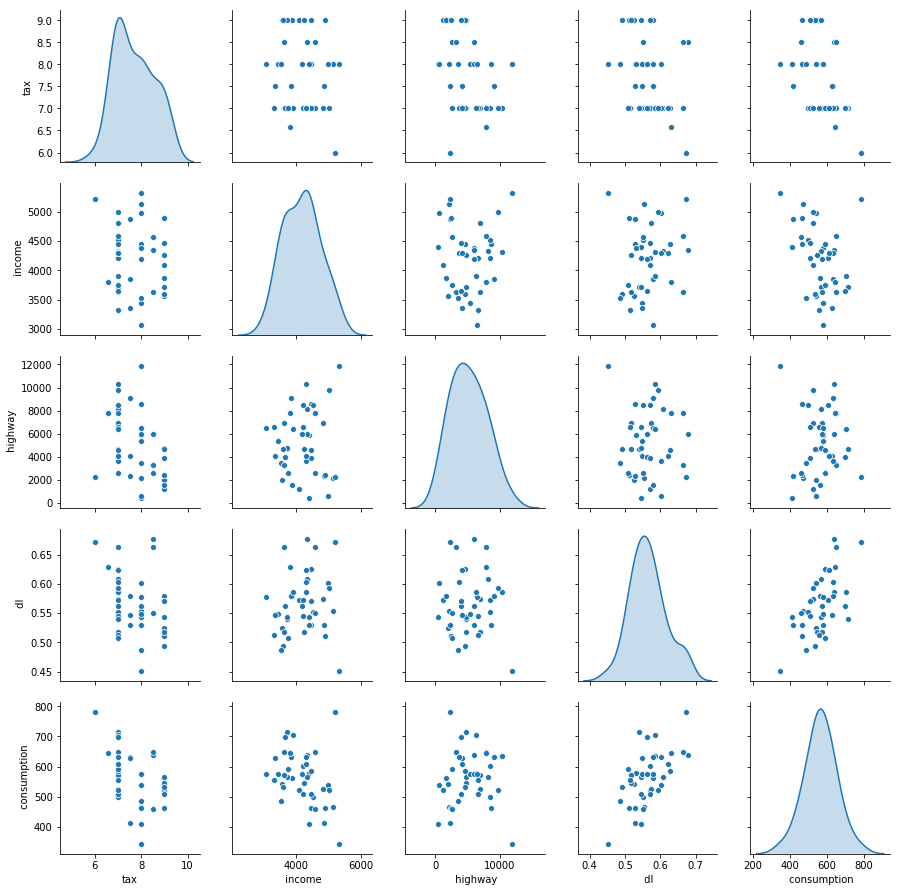

In [21]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
sns.pairplot(data_withoutoutlier, diag_kind='kde')

Proportions of drivers seems to have strong correlation with consumption dependent variable


,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


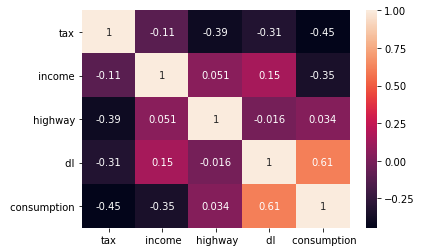

In [33]:
sns.heatmap(data_withoutoutlier.corr(),annot=True)
#np.corrcoef(data_withoutoutlier)

print('Proportions of drivers seems to have strong correlation with consumption dependent variable')
data_withoutoutlier.corr()

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [52]:
model_indepndnt_feature = [' dl','tax']
X = data_withoutoutlier[model_indepndnt_feature]

In [53]:
Y = data_withoutoutlier[[' consumption']]


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2, random_state=5)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(34, 2)
(9, 2)
(34, 1)
(9, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
#print(model.coef_)
#print(list(zip(model.coef_, model_indepndnt_feature)))
coef_dict = {}
for coef, feat in zip(model.coef_[0,:], model_indepndnt_feature):
    coef_dict[feat] = coef
print('Coefficients are', coef_dict)
print('Intercept is', model.intercept_)

Coefficients are {' dl': 812.4491909803405, 'tax': -29.645853125319515}
Intercept is [339.57762159]


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [76]:
## Combine all the steps to test the model performance
def linRegcheckModelPerformance(x, y):
    model = LinearRegression()
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                        random_state = seed)
    # Build model with train data set
    model.fit(x_train, y_train)
    # Train accuracies
    trainR2 = model.score(x_train, y_train)
    predictedConsumption = model.predict(x_train)
    mse = metrics.mean_squared_error(predictedConsumption, y_train)
    trainRmse = np.sqrt(mse)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    #trainAdjR2 = AdjRsquare(model, x_train, y_train)
    #trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    coef_dict = {}
    for coef, feat in zip(model.coef_[0,:], model_indepndnt_feature):
        coef_dict[feat] = coef
    intercept = model.intercept_
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, coef_dict,intercept]
    
    # Test accuracies
    testR2 = model.score(x_test, y_test)
    predictedConsumption = model.predict(x_test)
    mse = metrics.mean_squared_error(predictedConsumption, y_test)
    testRmse = np.sqrt(mse)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    #testAdjR2 = AdjRsquare(model, x_test, y_test)
    #testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2 ,'','']
    # Create dataframe for results
    #resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2","coeff", "Intercept"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    return ( round(resultsDf, 4))



In [77]:
# Model 4
#x = data[["TV", "Radio"]]
#y = data[["Sales"]]
model_indepndnt_feature = [' dl','tax']
X = data_withoutoutlier[model_indepndnt_feature] 
Y = data_withoutoutlier[[' consumption']]
seed =5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linRegcheckModelPerformance(X, Y)

,trainData,testData
dataSize,30,13
rmse,58.4091,81.2118
rmsePct,10.0256,15.5121
r2,0.462203,0.0930011
coeff,"{' dl': 635.2559734937555, 'tax': -37.17337808...",
Intercept,[503.7302296922383],


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [78]:
model_indepndnt_feature = [' dl','tax' , ' income',' highway']
X = data_withoutoutlier[model_indepndnt_feature] 
Y = data_withoutoutlier[[' consumption']]
seed =5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linRegcheckModelPerformance(X, Y)

,trainData,testData
dataSize,30,13
rmse,48.3552,60.42
rmsePct,8.2999,11.5407
r2,0.63141,0.497971
coeff,"{' dl': 839.6315871247438, 'tax': -43.17910221...",
Intercept,[754.9039297096325],


# Question 9: Print the coefficients of the multilinear regression model

In [79]:
linRegcheckModelPerformance(X, Y)

,trainData,testData
dataSize,30,13
rmse,48.3552,60.42
rmsePct,8.2999,11.5407
r2,0.63141,0.497971
coeff,"{' dl': 839.6315871247438, 'tax': -43.17910221...",
Intercept,[754.9039297096325],


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [80]:
print('As the variables gets added more for the model, the score percentage gets improved, hence other independent variables have a minor impact on the consumption')

As the variables gets added more for the model, the score percentage gets improved, hence other independent variables have a minor impact on the consumption
